# 06-post-analysis

How can we verify if the trained models are correct in their predictions? 

One way is to verify against known candidates. 

In [1]:
import sys
sys.path.insert(0, "../")

import pandas as pd
from pathlib import Path
from src.visualization import visualize

data_dir = Path.cwd().parent.parent.parent / "data"
models_dir = Path.cwd().parent.parent.parent / "models" 

print("Current data directory {}".format(data_dir))

# Optional: Load the "autoreload" extension so that code can change
%load_ext autoreload

#OPTIONAL: Always reload modules so that as you change code in src, it gets loaded
%autoreload 2

Current data directory /home/oliver/Dokumenter/masterprosjekt/predicting-solid-state-qubit-candidates/data


In [2]:
known_candidates = ["SiC","SiGe", "C", "Si",
                         "GaN", "GaAs", "AlN", "ZnS", "ZnSe", "ZnO",
                         "AlP", "GaP", "AlAs", "ZnTe", "CdS"
                    ]
QD_2D_candidates = ["BN", "MoS2", "WSe2", "WS2",#2D
                    "InAs" #QD
                   ] 

In [3]:
title = "Insightful summary"
InsertApproach = "03-insightful-approach"
numberOfPrincipalComponents = 176

## Training set

In [4]:
trainingSet   = pd.read_pickle(data_dir / InsertApproach / "processed" / "trainingData.pkl")
trainingTarget   = pd.read_pickle(data_dir / InsertApproach / "processed" / "trainingTarget.pkl")
trainingSet["candidate"] = trainingTarget

In [5]:
trainingSet

,material_id,full_formula,AtomicOrbitals|HOMO_character,AtomicOrbitals|HOMO_element,AtomicOrbitals|HOMO_energy,AtomicOrbitals|LUMO_character,AtomicOrbitals|LUMO_element,AtomicOrbitals|LUMO_energy,AtomicPackingEfficiency|dist from 1 clusters |APE| < 0.010,AtomicPackingEfficiency|dist from 3 clusters |APE| < 0.010,...,AFLOWML|ml_ael_shear_modulus_vrh,AFLOWML|ml_agl_debye,AFLOWML|ml_agl_heat_capacity_Cp_300K,AFLOWML|ml_agl_heat_capacity_Cp_300K_per_atom,AFLOWML|ml_agl_heat_capacity_Cv_300K,AFLOWML|ml_agl_heat_capacity_Cv_300K_per_atom,AFLOWML|ml_agl_thermal_conductivity_300K,AFLOWML|ml_agl_thermal_expansion_300K,AFLOWML|ml_egap_type_Insulator,candidate
0,mvc-12905,Fe4O8,3.0,26,-0.295049,3.0,26,-0.295049,0.040992,0.067233,...,74.980,559.793,29.522,2.614,29.011,2.488,2.762,0.000060,1,0.0
1,mp-24,C8,2.0,6,-0.199186,2.0,6,-0.199186,1.000000,1.000000,...,490.162,2012.191,4.036,0.679,4.262,0.634,3.043,0.000086,1,1.0
2,mp-47,C4,2.0,6,-0.199186,2.0,6,-0.199186,1.000000,1.000000,...,521.822,2076.203,1.740,0.629,1.816,0.588,3.223,0.000086,1,1.0
3,mp-66,C2,2.0,6,-0.199186,2.0,6,-0.199186,1.000000,1.000000,...,505.647,2070.786,1.149,0.658,1.139,0.617,4.279,0.000086,1,1.0
4,mp-149,Si2,2.0,14,-0.153293,2.0,14,-0.153293,1.000000,1.000000,...,49.213,560.299,5.108,2.666,4.739,2.577,3.417,0.000061,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,mp-1275839,Co4Bi24S8O64,3.0,27,-0.322368,3.0,27,-0.322368,0.034641,0.052087,...,58.263,362.421,122.952,2.800,118.318,2.709,2.690,0.000052,1,0.0
586,mp-1291058,Sr4Mn2Mo2O12,3.0,25,-0.266540,3.0,25,-0.266540,0.052116,0.058661,...,81.354,521.151,51.377,2.650,53.364,2.515,2.749,0.000060,0,0.0
587,mp-1291630,Fe12O16,3.0,26,-0.295049,3.0,26,-0.295049,0.091832,0.135247,...,82.942,521.152,64.432,2.666,63.321,2.496,2.841,0.000060,0,0.0
588,mp-1298346,Sr8Co4O16,3.0,27,-0.322368,3.0,27,-0.322368,0.057864,0.095274,...,72.603,505.797,34.850,2.733,35.375,2.654,2.725,0.000061,0,0.0


In [6]:
#trainingSet[["full_formula", "pretty_formula", "candidate"]][trainingSet["pretty_formula"].isin(known_candidates)]

## Test set
How many entries in our test set consists of known candidates?

In [7]:
Summary = pd.read_pickle(models_dir / InsertApproach /  "summary" / Path("PCA-" + str(numberOfPrincipalComponents) + "-" + "summary.pkl"))
Summary = Summary.reset_index(drop=True)
Summary.shape

(24614, 11)

In [8]:
Summary[Summary["pretty_formula"].isin(known_candidates)]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
15385,mp-630227,C60,C,0.0,0.433807,0.0,0.000000,0.0,0.476389,0.0,0.240796
16153,mp-667273,C60,C,1.0,0.874914,0.0,0.000000,0.0,0.440000,0.0,0.402958
16406,mp-680372,C60,C,0.0,0.313422,0.0,0.000000,0.0,0.400317,0.0,0.116961
16481,mp-683919,C140,C,0.0,0.358009,0.0,0.000000,0.0,0.360000,0.0,0.006752
21329,mp-1194362,C28,C,0.0,0.053399,0.0,0.018587,0.0,0.467500,0.0,0.015358
22128,mp-1196583,C240,C,1.0,0.693451,0.0,0.000000,0.0,0.310000,0.0,0.002193
24102,mp-1203645,C48,C,0.0,0.037840,1.0,1.000000,0.0,0.421429,0.0,0.007918
24551,mp-1205417,C20,C,1.0,0.763506,0.0,0.018587,0.0,0.223333,0.0,0.005828


In [9]:
Summary[Summary["pretty_formula"].isin(QD_2D_candidates)]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
44,mp-344,B4N4,BN,0.0,0.368908,1.0,0.888889,1.0,0.665064,1.0,0.978666
238,mp-1599,B4N4,BN,0.0,0.315578,1.0,1.000000,0.0,0.318112,1.0,0.826922
241,mp-1639,B1N1,BN,1.0,0.999891,1.0,0.959459,1.0,0.777815,1.0,0.997104
385,mp-2653,B2N2,BN,1.0,0.999107,1.0,0.959459,1.0,0.785501,1.0,0.997153
3088,mp-13151,B4N4,BN,1.0,0.998157,1.0,0.888889,1.0,0.704531,1.0,0.989108
5149,mp-20305,In1As1,InAs,1.0,0.890361,0.0,0.000000,1.0,0.500717,0.0,0.046679
15781,mp-644751,B4N4,BN,1.0,0.981835,1.0,0.888889,0.0,0.477601,0.0,0.362146
19246,mp-1077506,B3N3,BN,1.0,0.661792,1.0,0.888889,0.0,0.418571,1.0,0.680031


## How many entries does the models agree on? 

In [11]:
RF_DT_GB_LOG = Summary[(Summary["RF "] == 1) & 
                       (Summary["DT "] == 1) & 
                       (Summary["GB "] == 1) & 
                       (Summary["LOG "] == 1)]

RF_DT_GB_LOG.to_csv(models_dir / InsertApproach / "summary" / "RF_DT_GB_LOG.csv")
RF_DT_GB_LOG

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
7,mp-111,Ne1,Ne,1.0,0.999749,1.0,0.959459,1.0,0.700230,1.0,0.951907
10,mp-147,Se6,Se,1.0,0.573968,1.0,0.959459,1.0,0.584573,1.0,0.945412
15,mp-189,Si4Ru4,SiRu,1.0,0.604836,1.0,0.959459,1.0,0.693118,1.0,0.980515
27,mp-252,Be1Te1,BeTe,1.0,0.803121,1.0,0.959459,1.0,0.776303,1.0,0.955265
135,mp-938,Ge1Te1,GeTe,1.0,0.593217,1.0,0.959459,1.0,0.530327,1.0,0.865107
...,...,...,...,...,...,...,...,...,...,...,...
19396,mp-1079201,B2C4N2,BC2N,1.0,0.997324,1.0,0.888889,1.0,0.778031,1.0,0.988445
19823,mp-1104073,C11N4,C11N4,1.0,0.979759,1.0,0.888889,1.0,0.618571,1.0,0.525333
19844,mp-1104326,Ho2V2O8,HoVO4,1.0,1.000000,1.0,1.000000,1.0,0.620000,1.0,0.997603
20546,mp-1190284,Bi8Se9,Bi8Se9,1.0,1.000000,1.0,1.000000,1.0,0.522333,1.0,0.668594


In [12]:
Summary[(Summary["RF Prob"] > 0.8) & 
        (Summary["DT Prob"] > 0.8) & 
        (Summary["GB Prob"] > 0.8) & 
        (Summary["LOG Prob"] > 0.8)]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
862,mp-4524,Zn2Ge2P4,ZnGeP2,1.0,0.908094,1.0,0.959459,1.0,0.820188,1.0,0.997297
5773,mp-23158,He1,He,1.0,1.000000,1.0,0.959459,1.0,0.812487,1.0,0.997477
15381,mp-629458,B1C2N1,BC2N,1.0,0.999050,1.0,0.959459,1.0,0.838031,1.0,0.995945
18719,mp-999498,N4,N2,1.0,0.941501,1.0,0.888889,1.0,0.846558,1.0,0.990028
18757,mp-1008523,B1C2N1,BC2N,1.0,0.999292,1.0,0.959459,1.0,0.808571,1.0,0.997153
18790,mp-1009792,Ru1C1,RuC,1.0,0.847570,1.0,0.959459,1.0,0.813300,1.0,0.988016


In [ ]:
RF_DT_GB = Summary[(Summary["RF "] == 1) & 
                       (Summary["DT "] == 1) & 
                       (Summary["GB "] == 1)]

RF_DT_GB.to_csv(models_dir / InsertApproach / "summary" / "RF_DT_GB.csv")
RF_DT_GB

In [ ]:
Summary[(Summary["RF Prob"] > 0.75) & 
        (Summary["DT Prob"] > 0.75) & 
        (Summary["GB Prob"] > 0.75)]

In [ ]:
Summary[(Summary["RF "] == 1) &  
        (Summary["GB "] == 1)]

In [ ]:
Summary[Summary["LOG "]==1]

In [ ]:
generatedData = pd.read_pickle(data_dir / "interim" / "featurized" / "featurized-19-03-2021.pkl")
generatedData = generatedData[~generatedData["material_id"].isin(trainingSet["material_id"])].reset_index(drop=True)

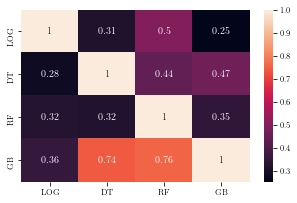

[1.0, 0.2799188640973631, 0.2231237322515213, 0.15021459227467812, 0.46924177396280403, 0.3190045248868778, 0.34763948497854075, 1.0, 1.0, 0.25178826895565093, 0.32454361054766734]


,LOG LOG LOG LOG,LOG LOG LOG DT,LOG LOG RF DT,LOG RF GB DT,DT GB DT DT,DT RF DT DT,RF RF GB GB,RF RF RF RF,GB GB GB GB,GB LOG LOG LOG,RF LOG LOG LOG
LOG LOG LOG LOG,1.0,0.279919,0.223124,0.150215,0.469242,0.319005,0.347639,1.0,1.0,0.251788,0.324544
LOG LOG LOG DT,1.0,0.279919,0.223124,0.150215,0.469242,0.319005,0.347639,1.0,1.0,0.251788,0.324544
LOG LOG RF DT,1.0,0.279919,0.223124,0.150215,0.469242,0.319005,0.347639,1.0,1.0,0.251788,0.324544
LOG RF GB DT,1.0,0.279919,0.223124,0.150215,0.469242,0.319005,0.347639,1.0,1.0,0.251788,0.324544
DT GB DT DT,1.0,0.279919,0.223124,0.150215,0.469242,0.319005,0.347639,1.0,1.0,0.251788,0.324544
DT RF DT DT,1.0,0.279919,0.223124,0.150215,0.469242,0.319005,0.347639,1.0,1.0,0.251788,0.324544
RF RF GB GB,1.0,0.279919,0.223124,0.150215,0.469242,0.319005,0.347639,1.0,1.0,0.251788,0.324544
RF RF RF RF,1.0,0.279919,0.223124,0.150215,0.469242,0.319005,0.347639,1.0,1.0,0.251788,0.324544
GB GB GB GB,1.0,0.279919,0.223124,0.150215,0.469242,0.319005,0.347639,1.0,1.0,0.251788,0.324544
GB LOG LOG LOG,1.0,0.279919,0.223124,0.150215,0.469242,0.319005,0.347639,1.0,1.0,0.251788,0.324544


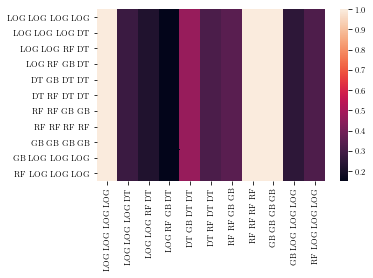

In [40]:
visualize.visualize_heatmap_of_combinations(Summary)

In [ ]:
abbreviations = ["LOG ", "DT ", "RF ", "GB "]
for i in range(len(abbreviations)):
    generatedData["candidate"] = Summary[abbreviations[i]]
    visualize.make_parallel_coordinate_matplot(generatedData[Summary[abbreviations[i]]!=-1], InsertApproach+str(abbreviations[i]), title=str(abbreviations[i]) + "" + title, applyLegend=False)